<a href="https://colab.research.google.com/github/manikanta70137/Credit-card-Fraud-detection-using-LSTM-RNN/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

<p style='text-align: center;'> </p>
<h1 align="center">Credit Card Fraud Detection</h1>
<h4 align='center'>using LSTM-RNN</h4>
<div style="text-align: right">created<br>
-- by Manikanta Chundu<br>

---

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.metrics import confusion_matrix,classification_report

Class
0.0    75173
1.0      183
Name: count, dtype: int64
Normal share = 99.76
Fraud share = 0.24


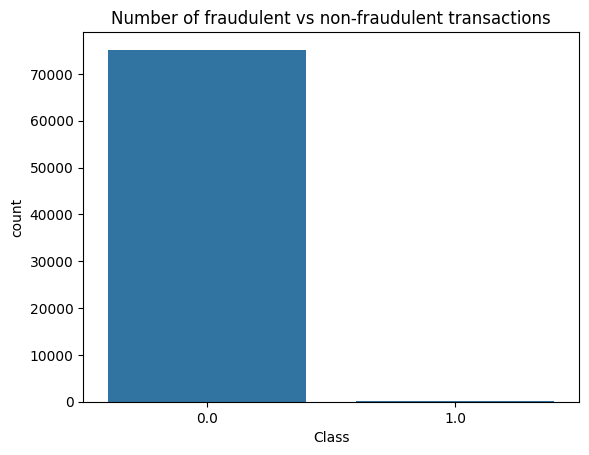

In [ ]:
# Load dataset
df = pd.read_csv('/content/creditcard.csv')

# Check class distribution
classes = df['Class'].value_counts()
print(classes)

# Calculate percentage shares of normal and fraud transactions
normal_share = round((classes[0] / df['Class'].count() * 100), 2)
fraud_share = round((classes[1] / df['Class'].count() * 100), 2)
print("Normal share =", normal_share)
print("Fraud share =", fraud_share)

# Plot class distribution
sns.countplot(x='Class', data=df)
plt.title('Number of fraudulent vs non-fraudulent transactions')
plt.show()


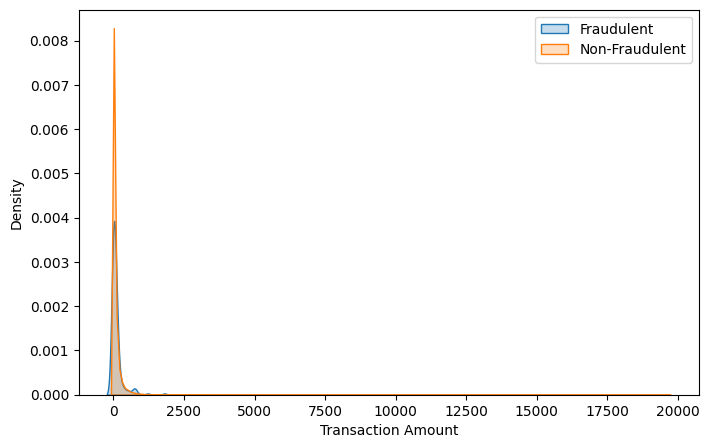

In [ ]:
# Separate fraudulent and non-fraudulent transactions
data_fraud = df[df['Class'] == 1]
data_non_fraud = df[df['Class'] == 0]

# Plot distribution of transaction amounts
plt.figure(figsize=(8, 5))
sns.kdeplot(data_fraud['Amount'], label='Fraudulent', fill=True)
sns.kdeplot(data_non_fraud['Amount'], label='Non-Fraudulent', fill=True)
plt.xlabel('Transaction Amount')
plt.legend()
plt.show()


In [ ]:
# Define features (X) and target (y)
X = df.drop(['Class'], axis=1)
y = df['Class']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)


In [ ]:
# Standardize 'Amount' column
scaler = StandardScaler()

# Fit on training data and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

# Transform test data
X_test['Amount'] = scaler.transform(X_test[['Amount']])

# Display first few rows of scaled training data
print(X_train.head())
print(X_test.head())


        Time        V1        V2        V3        V4        V5        V6  \
30047  35751  1.183241 -0.298470  1.004005 -0.103225 -0.884320 -0.036911   
44834  42102  1.364516 -1.303987  0.053042 -1.352127  0.557024  4.382156   
66206  51935  1.154312 -0.409229  1.070647  0.696001 -1.094773  0.154841   
56148  47289 -1.462415 -0.385962  1.179740 -1.517042  0.292525 -0.254485   
62943  50484 -0.917510  0.707760  2.674697  0.365147 -0.337259 -0.427546   

             V7        V8        V9  ...       V20       V21       V22  \
30047 -0.661969  0.111142  0.534398  ...  0.063182 -0.027372  0.042742   
44834 -2.132276  1.218370  0.573979  ...  0.157535  0.086932  0.461646   
66206 -0.899440  0.382117  1.069701  ... -0.231472 -0.088725 -0.224314   
56148 -0.033292 -0.864329 -0.950800  ... -0.450555  0.808981  0.335552   
62943  0.216742  0.056257  0.218450  ... -0.152413  0.058281  0.324710   

            V23       V24       V25       V26       V27       V28    Amount  
30047 -0.012559  0.0

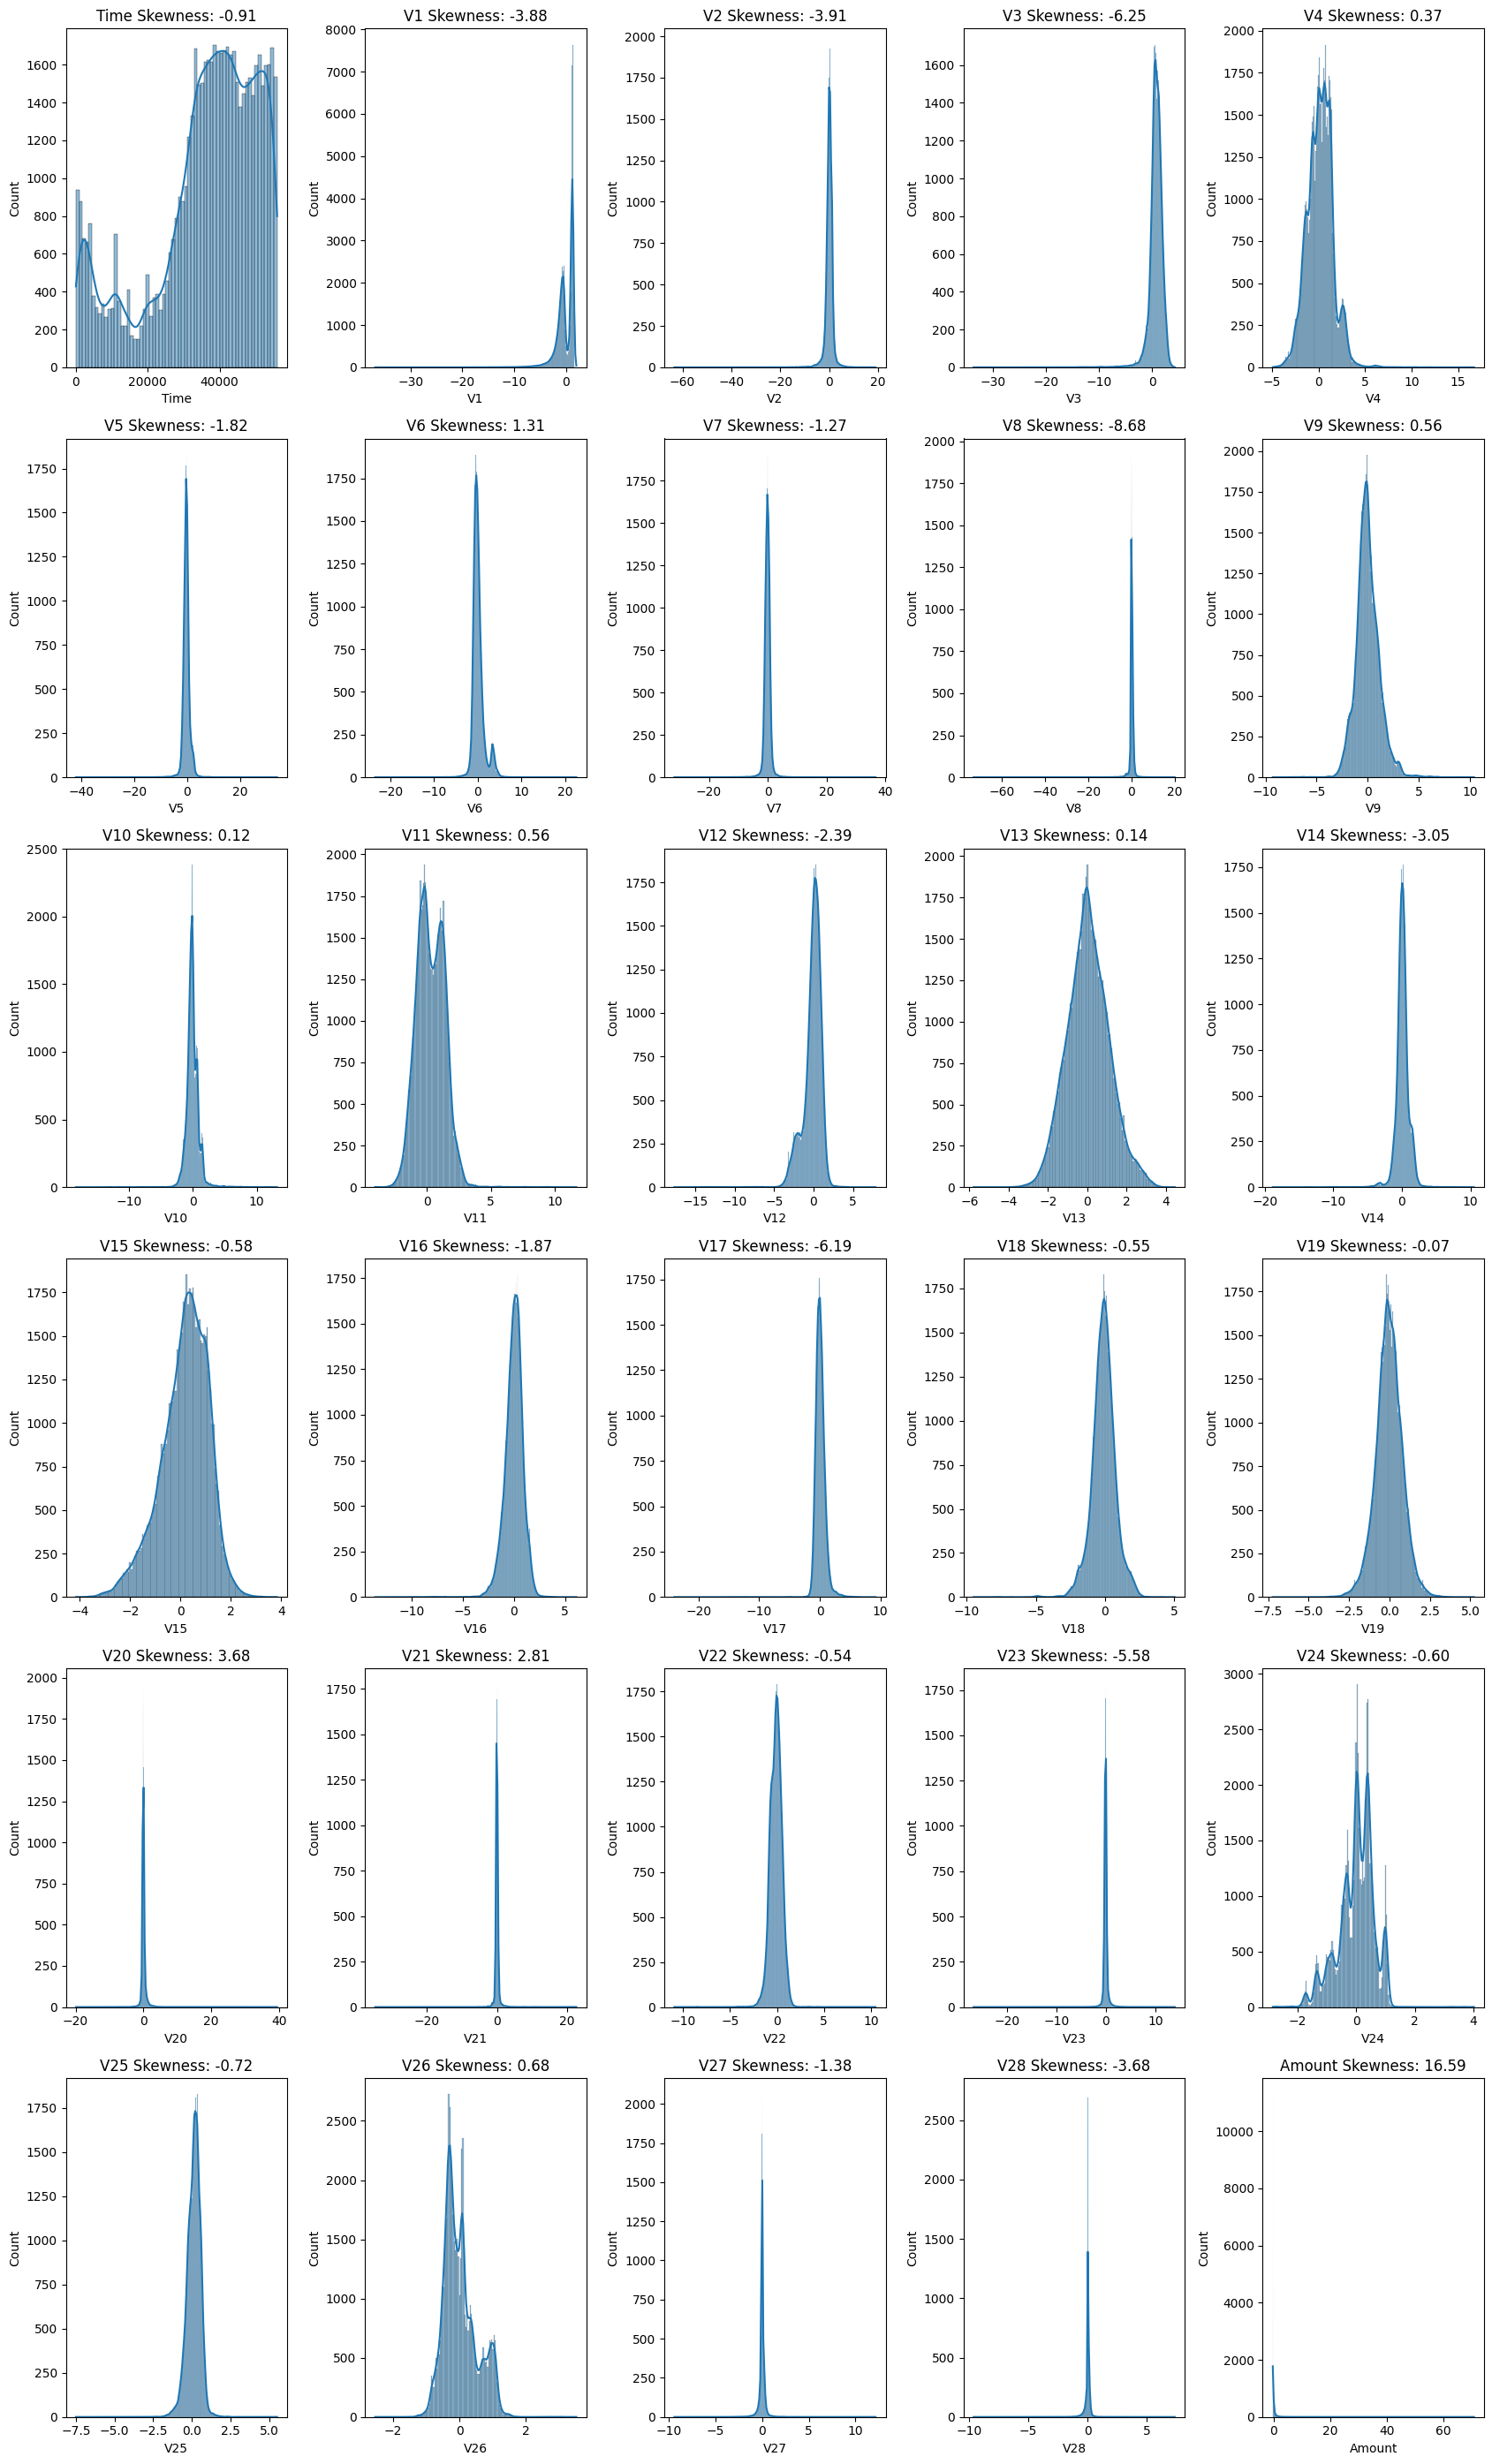

In [ ]:
# Plot distribution and skewness of each feature in training data before transformation
cols = X_train.columns
plt.figure(figsize=(17, 28))
for i, col in enumerate(cols, 1):
    plt.subplot(6, 5, i)
    sns.histplot(X_train[col], kde=True)
    plt.title(f'{col} Skewness: {X_train[col].skew():.2f}')
plt.tight_layout()
plt.show()


In [ ]:
# Apply power transformation to reduce skewness
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
X_train[cols] = pt.fit_transform(X_train)
X_test[cols] = pt.transform(X_test)


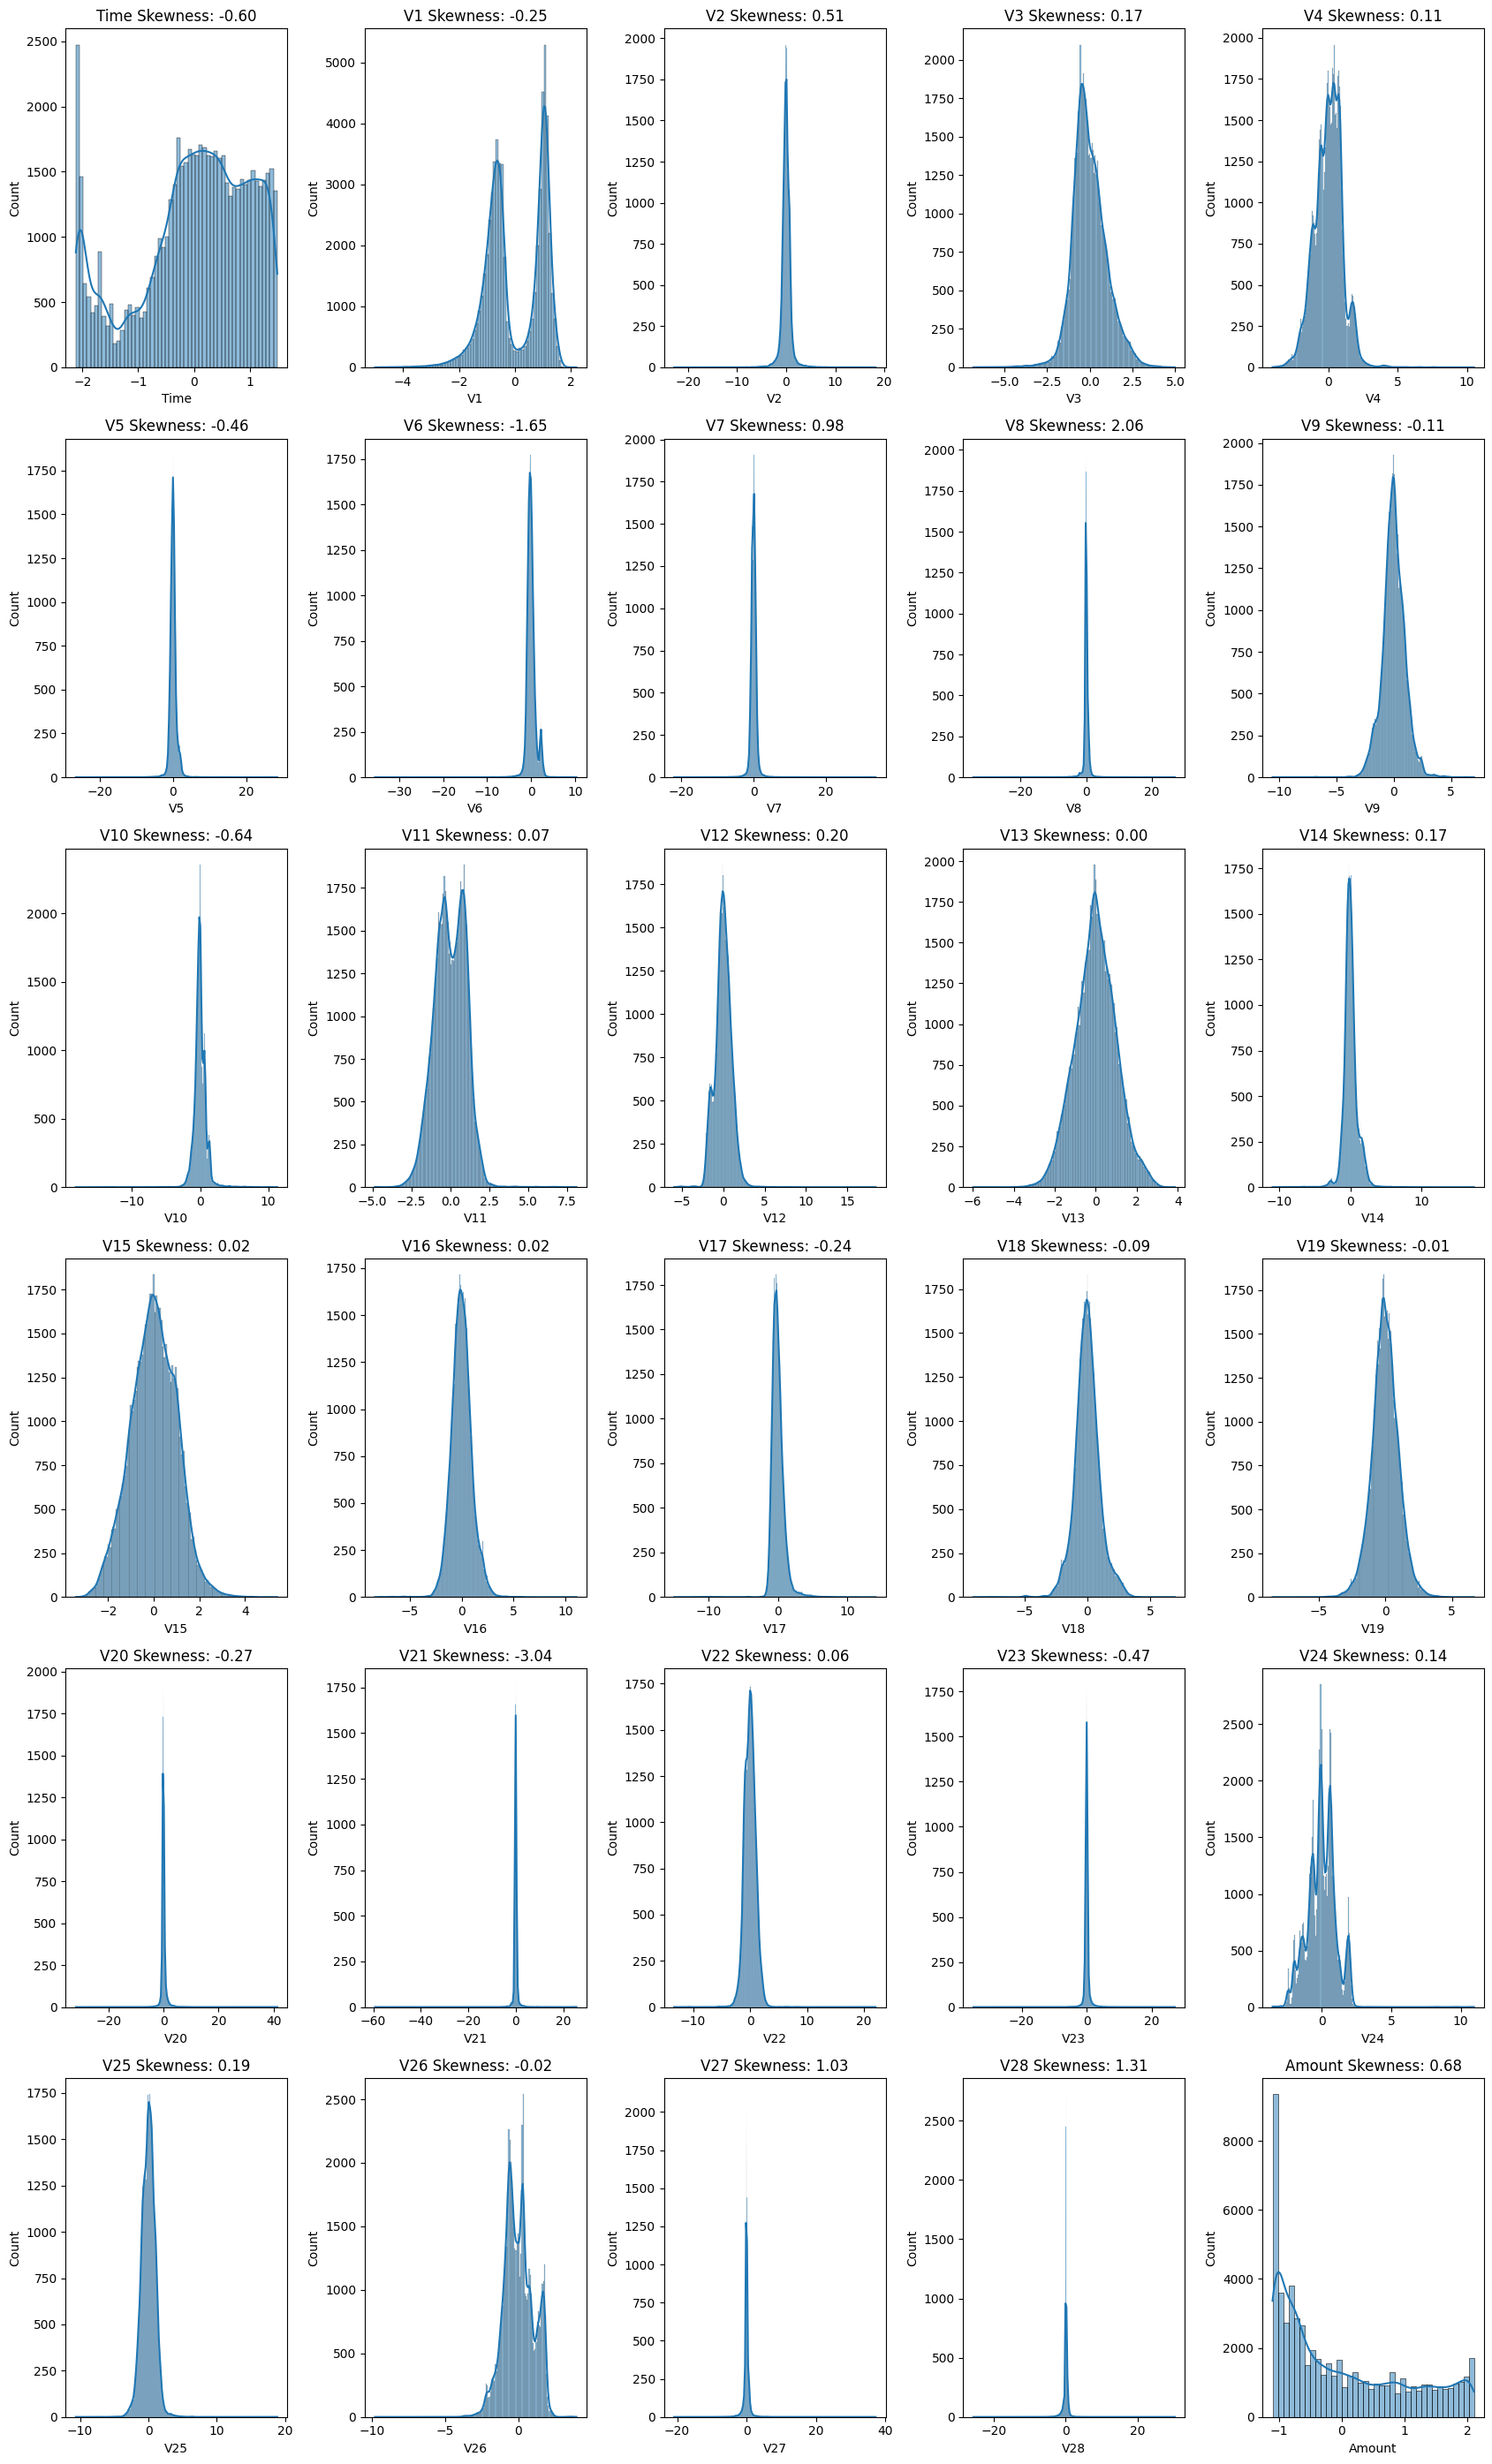

In [ ]:
# Plot distribution and skewness of each feature in training data after transformation
plt.figure(figsize=(17, 28))
for i, col in enumerate(cols, 1):
    plt.subplot(6, 5, i)
    sns.histplot(X_train[col], kde=True)
    plt.title(f'{col} Skewness: {X_train[col].skew():.2f}')
plt.tight_layout()
plt.show()


In [ ]:
# Oversample the minority class
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Check class distribution after oversampling
print('Before sampling:', Counter(y_train))
print('After sampling:', Counter(y_train_ros))


Before sampling: Counter({0.0: 60137, 1.0: 148})
After sampling: Counter({0.0: 60137, 1.0: 60137})


In [ ]:
# Define input shape for LSTM model
input_shape = (X_train_ros.shape[1], 1)
print(input_shape)

# Build model
inputs = tf.keras.layers.Input(shape=input_shape)
l1 = tf.keras.layers.LSTM(64, activation='tanh')(inputs)
l1 = tf.keras.layers.Dropout(0.20)(l1)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(l1)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


(30, 1)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 30, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
checkpoint_dir = '../models'
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=20, verbose=1),
    tf.keras.callbacks.ModelCheckpoint(os.path.join(checkpoint_dir, 'Fraud_Detection_Model.keras'), save_best_only=True, verbose=1)
]

history = model.fit(
    X_train_ros.to_numpy().reshape(X_train_ros.shape[0], X_train_ros.shape[1], 1),
    y_train_ros,
    validation_split=0.20,
    epochs=100,
    callbacks=callbacks
)


Epoch 1/100
3007/3007 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9497 - loss: 0.1709
Epoch 1: val_loss improved from inf to 0.14762, saving model to ../models/Fraud_Detection_Model.keras
3007/3007 ━━━━━━━━━━━━━━━━━━━━ 61s 20ms/step - accuracy: 0.9497 - loss: 0.1708 - val_accuracy: 0.9246 - val_loss: 0.1476
Epoch 2/100
3004/3007 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9713 - loss: 0.0719
Epoch 2: val_loss improved from 0.14762 to 0.09133, saving model to ../models/Fraud_Detection_Model.keras
3007/3007 ━━━━━━━━━━━━━━━━━━━━ 61s 20ms/step - accuracy: 0.9713 - loss: 0.0719 - val_accuracy: 0.9445 - val_loss: 0.0913
Epoch 3/100
3007/3007 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9887 - loss: 0.0346
Epoch 3: val_loss improved from 0.09133 to 0.00417, saving model to ../models/Fraud_Detection_Model.keras
3007/3007 ━━━━━━━━━━━━━━━━━━━━ 63s 21ms/step - accuracy: 0.9888 - loss: 0.0346 - val_accuracy: 1.0000 - val_loss: 0.0042
Epoch 4/100
3004/3007 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/st

In [ ]:
# Evaluate model on test data
model.evaluate(X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1), y_test, verbose=1)


471/471 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9985 - loss: nan


[nan, 0.9984740018844604]

In [ ]:
# Define a function to calculate metrics
def calculate_metrics(y_true, y_pred):
    con_list = confusion_matrix(y_true, y_pred)
    tp, fp = con_list[0][0], con_list[0][1]
    fn, tn = con_list[1][0], con_list[1][1]

    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    sensitivity = recall
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    f1_score = (2 * precision * recall) / (precision + recall)

    print("Confusion Matrix:\n", con_list)
    print("Recall:", recall)
    print("Precision:", precision)
    print("Sensitivity:", sensitivity)
    print("Accuracy:", accuracy * 100)
    print("F1 Score:", f1_score)

    return {
        "recall": recall,
        "precision": precision,
        "sensitivity": sensitivity,
        "accuracy": accuracy * 100,
        "f1_score": f1_score
}


In [ ]:
print("NaN values in y_test:", y_test.isna().sum())


NaN values in y_test: 1


In [ ]:
# Option 1: Remove NaNs from y_test and corresponding X_test rows
X_test = X_test[y_test.notna()]
y_test = y_test[y_test.notna()]

# Option 2: Fill NaNs in y_test with a default value (e.g., 0 for non-fraudulent)
y_test = y_test.fillna(0)


In [ ]:
# Check and handle NaNs in y_test
if y_test.isna().sum() > 0:
    # Optionally, you can choose either option below
    # X_test = X_test[y_test.notna()]
    # y_test = y_test[y_test.notna()]

    # Fill NaNs with 0 (or 1 if appropriate)
    y_test = y_test.fillna(0)

# Prediction on training set
y_pred_train = (model.predict(X_train.to_numpy().reshape(X_train.shape[0], X_train.shape[1], 1)) > 0.5).astype(int)
print("Training Metrics:")

# Calculate training confusion matrix and classification report
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
class_report_train = classification_report(y_train, y_pred_train)

print("Confusion Matrix (Training):\n", conf_matrix_train)
print("\nClassification Report (Training):\n", class_report_train)

# Prediction on test set
y_pred_test = (model.predict(X_test.to_numpy().reshape(X_test.shape[0], X_test.shape[1], 1)) > 0.5).astype(int)
print("\nTesting Metrics:")

# Calculate testing confusion matrix and classification report
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
class_report_test = classification_report(y_test, y_pred_test)

print("Confusion Matrix (Testing):\n", conf_matrix_test)
print("\nClassification Report (Testing):\n", class_report_test)


1884/1884 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step
Training Metrics:
Confusion Matrix (Training):
 [[60126    11]
 [    0   148]]

Classification Report (Training):
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     60137
         1.0       0.93      1.00      0.96       148

    accuracy                           1.00     60285
   macro avg       0.97      1.00      0.98     60285
weighted avg       1.00      1.00      1.00     60285

471/471 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step

Testing Metrics:
Confusion Matrix (Testing):
 [[15021    15]
 [    7    28]]

Classification Report (Testing):
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     15036
         1.0       0.65      0.80      0.72        35

    accuracy                           1.00     15071
   macro avg       0.83      0.90      0.86     15071
weighted avg       1.00      1.00      1.00     15071

